In [36]:
import numpy as np
import pandas as pd
import os
import pandas as pd
from PIL import Image

In [40]:
def df_image_converter(main_folder_path):
    main_folder = main_folder_path  # Replace with the path to your main folder
    labels = []
    images = []

    # iterating over each sub folder in the main 
    for sub_folder in os.listdir(main_folder):
        sub_folder_path = os.path.join(main_folder, sub_folder)

        # iterating over image in each sub folder
        for image_name in os.listdir(sub_folder_path):
            image_path = os.path.join(sub_folder_path, image_name)
            
            # image processecing with grayscaling and resizing
            img = Image.open(image_path)
            img = img.convert("L")
            img = img.resize((250, 250))

            # appending specific dinosaur species with label
            labels.append(sub_folder)
            images.append(img)

    # dataframe with species and image path
    df = pd.DataFrame({'Dinosaur Species': labels, 'Dinosaur Images':images})
    return df

In [41]:
dino_df = df_image_converter("dinopics")
dino_df

,Dinosaur Species,Dinosaur Images
0,ankylosaurus,<PIL.Image.Image image mode=L size=250x250 at ...
1,ankylosaurus,<PIL.Image.Image image mode=L size=250x250 at ...
2,ankylosaurus,<PIL.Image.Image image mode=L size=250x250 at ...
3,ankylosaurus,<PIL.Image.Image image mode=L size=250x250 at ...
4,ankylosaurus,<PIL.Image.Image image mode=L size=250x250 at ...
...,...,...
195,triceratops,<PIL.Image.Image image mode=L size=250x250 at ...
196,triceratops,<PIL.Image.Image image mode=L size=250x250 at ...
197,triceratops,<PIL.Image.Image image mode=L size=250x250 at ...
198,triceratops,<PIL.Image.Image image mode=L size=250x250 at ...


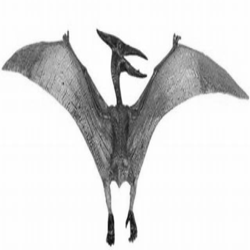

In [42]:
dino_df['Dinosaur Images'].iloc[100]